In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import imblearn
import matplotlib.pyplot as plt
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('drive/MyDrive/creditcard.csv')

Mounted at /content/drive


In [3]:
f = df

# Analyzing the features

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
correlations = df.corr(numeric_only=True, method='pearson')['Amount']
print(correlations[correlations.abs()>0.3].sort_values(ascending=False))

Amount    1.000000
V7        0.397311
V20       0.339403
V5       -0.386356
V2       -0.531409
Name: Amount, dtype: float64


In [6]:
correlations = df.corr(numeric_only=True, method='pearson')['Class']
print(correlations[correlations.abs()>0.3].sort_values(ascending=False))

Class    1.000000
V14     -0.302544
V17     -0.326481
Name: Class, dtype: float64


<Axes: ylabel='Amount'>

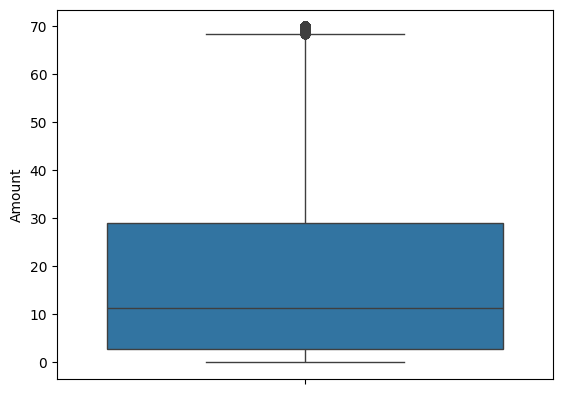

In [7]:
g = df[df['Amount']<=70]
sns.boxplot(g['Amount'])

<Axes: xlabel='Class', ylabel='Amount'>

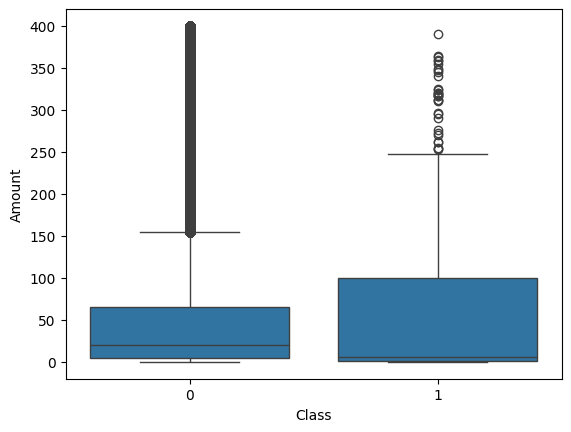

In [8]:
h = df [df['Amount']<=400]
sns.boxplot(x='Class', y='Amount', data=h)

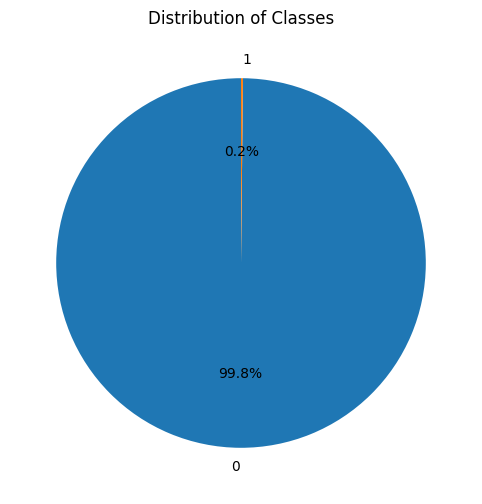

In [9]:

class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Classes')
plt.show()

<Axes: xlabel='Class', ylabel='V1'>

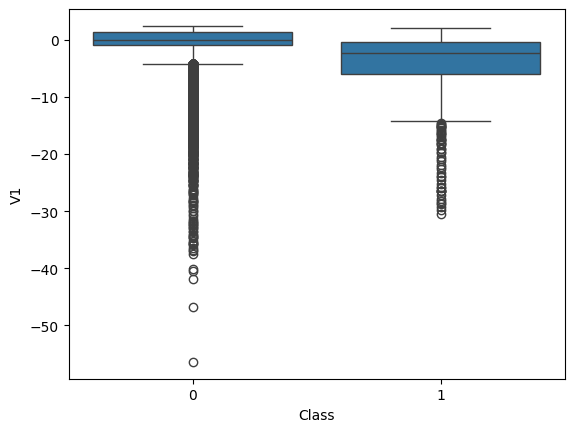

In [10]:
sns.boxplot(x='Class', y='V1', data=f)

<Axes: xlabel='Class', ylabel='V2'>

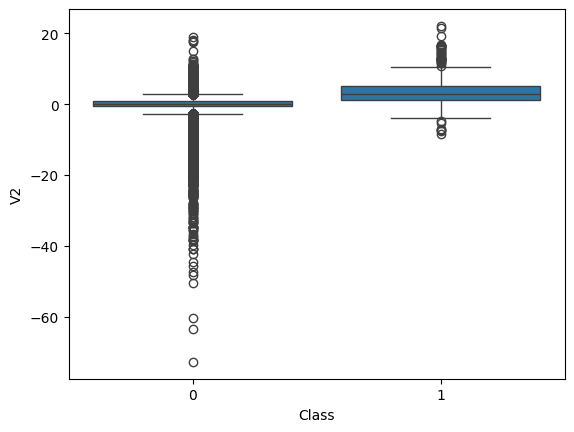

In [11]:
sns.boxplot(x='Class', y='V2', data=f)

<Axes: xlabel='Class', ylabel='V3'>

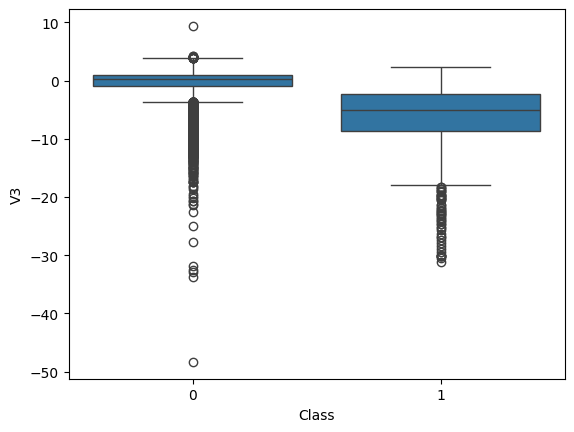

In [12]:
sns.boxplot(x='Class', y='V3', data=f)

<Axes: xlabel='Class', ylabel='V4'>

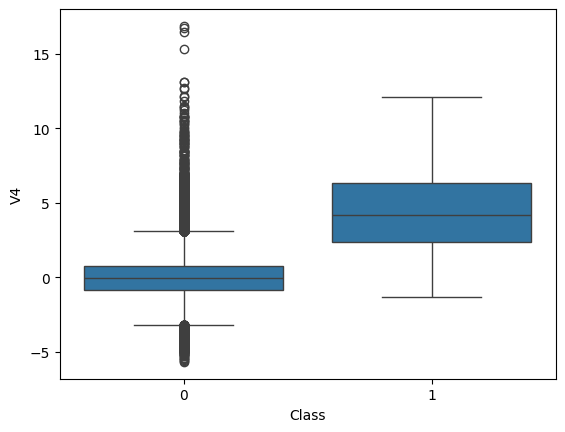

In [13]:
sns.boxplot(x='Class', y='V4', data=f)

<Axes: xlabel='Class', ylabel='V5'>

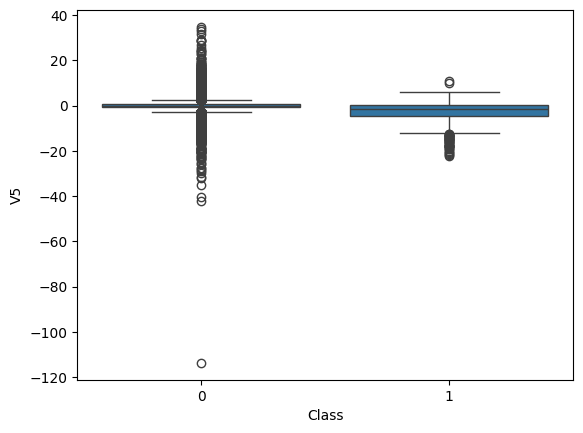

In [14]:
sns.boxplot(x='Class', y='V5', data=f)

<Axes: xlabel='Class', ylabel='V6'>

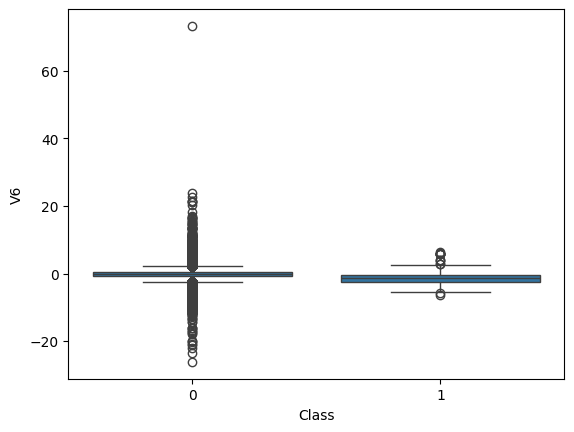

In [15]:
sns.boxplot(x='Class', y='V6', data=f)

<Axes: xlabel='Class', ylabel='V7'>

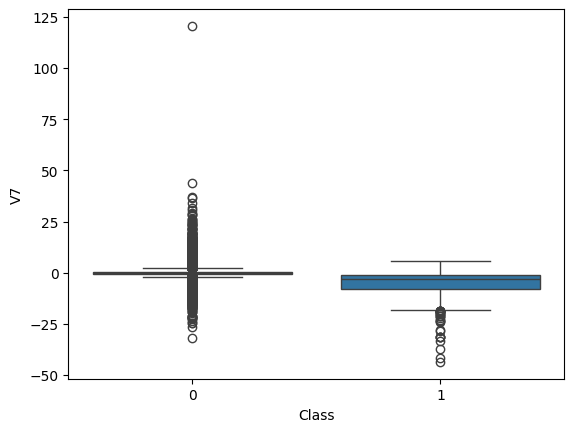

In [16]:
sns.boxplot(x='Class', y='V7', data=f)

<Axes: xlabel='Class', ylabel='V8'>

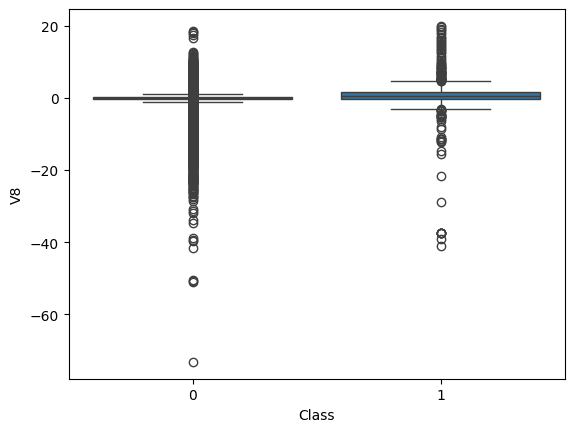

In [17]:
sns.boxplot(x='Class', y='V8', data=f)

<Axes: xlabel='Class', ylabel='V9'>

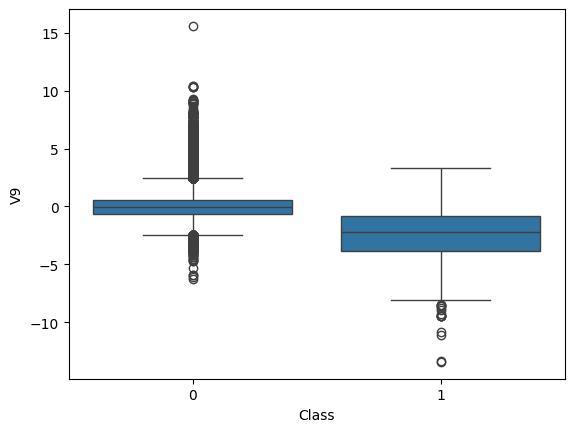

In [18]:
sns.boxplot(x='Class', y='V9', data=f)

<Axes: xlabel='Class', ylabel='V10'>

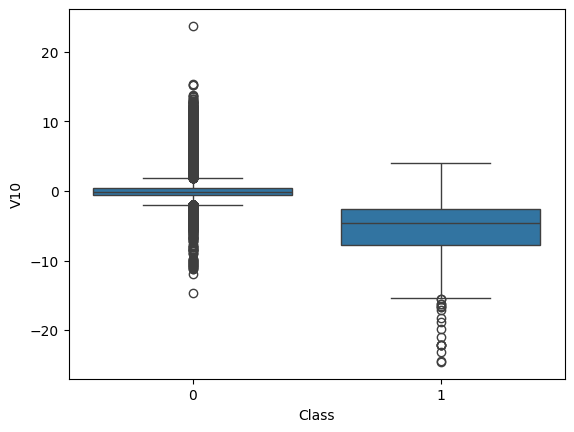

In [19]:
sns.boxplot(x='Class', y='V10', data=f)

<Axes: xlabel='Class', ylabel='V11'>

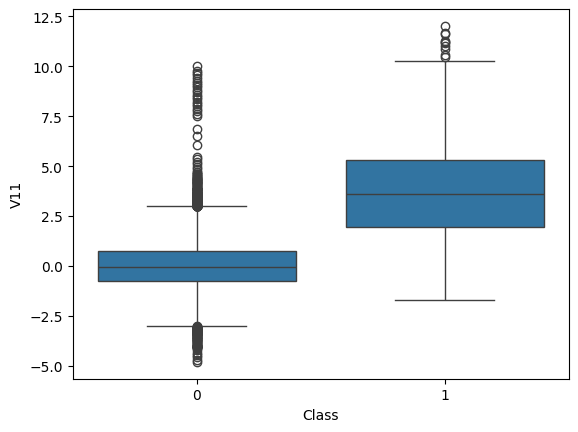

In [20]:
sns.boxplot(x='Class', y='V11', data=f)

<Axes: xlabel='Class', ylabel='V12'>

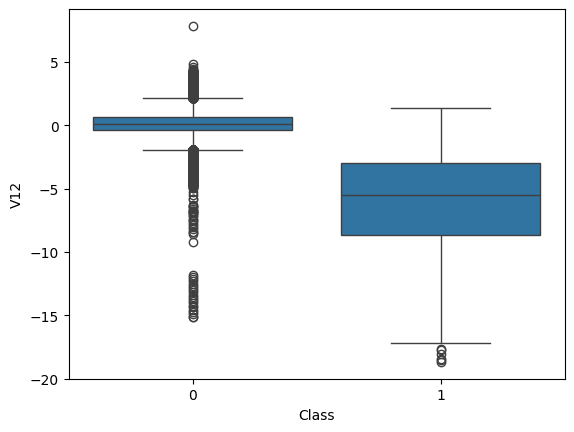

In [21]:
sns.boxplot(x='Class', y='V12', data=f)

<Axes: xlabel='Class', ylabel='V13'>

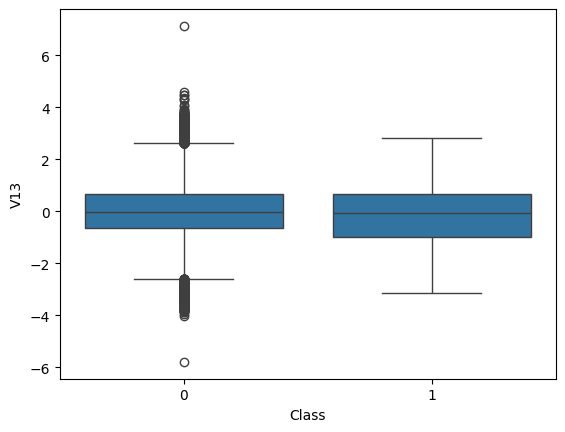

In [22]:
sns.boxplot(x='Class', y='V13', data=f)

<Axes: xlabel='Class', ylabel='V14'>

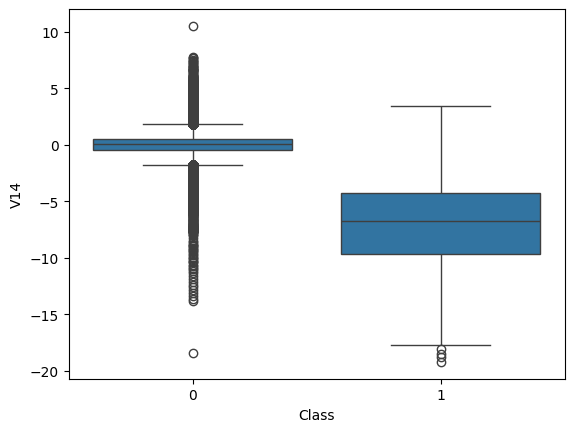

In [23]:
sns.boxplot(x='Class', y='V14', data=f)

<Axes: xlabel='Class', ylabel='V15'>

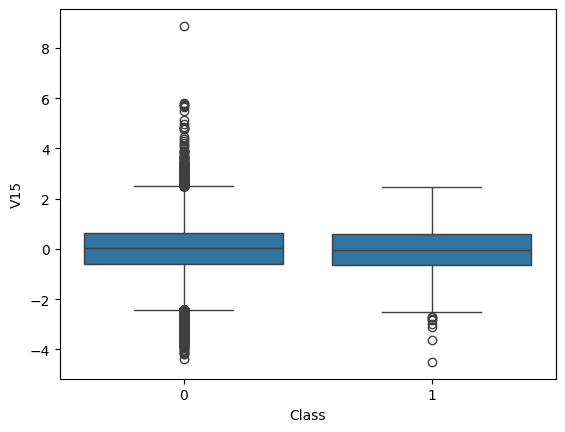

In [24]:
sns.boxplot(x='Class', y='V15', data=f)

<Axes: xlabel='Class', ylabel='V16'>

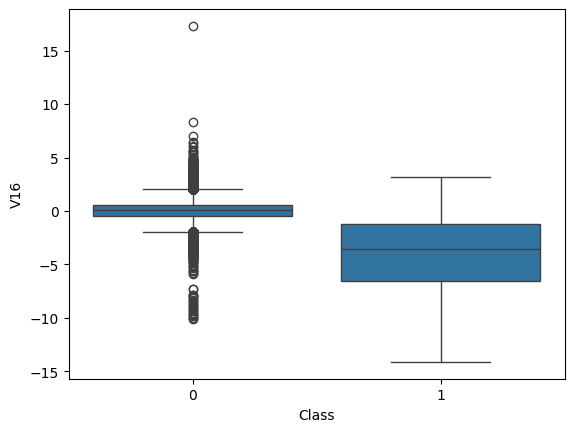

In [25]:
sns.boxplot(x='Class', y='V16', data=f)

<Axes: xlabel='Class', ylabel='V17'>

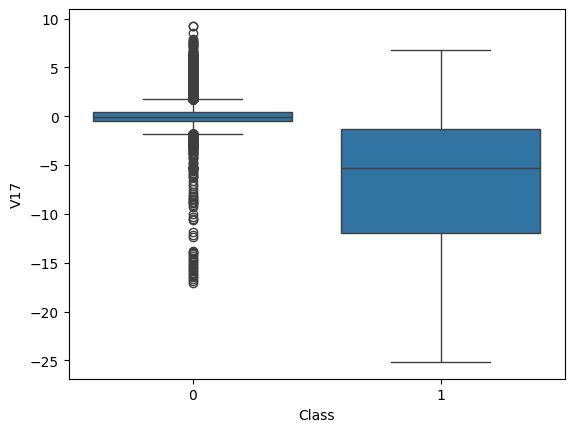

In [26]:
sns.boxplot(x='Class', y='V17', data=f)

<Axes: xlabel='Class', ylabel='V18'>

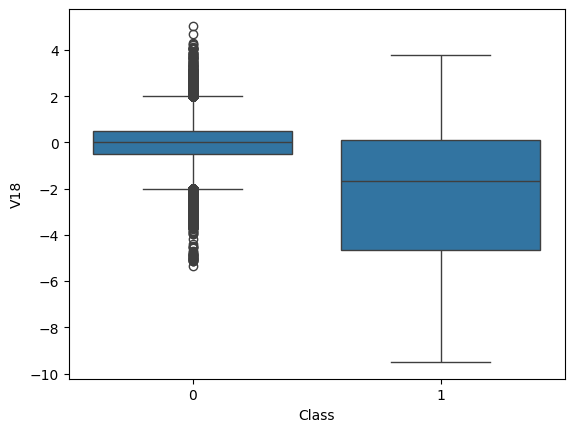

In [27]:
sns.boxplot(x='Class', y='V18', data=f)

<Axes: xlabel='Class', ylabel='V19'>

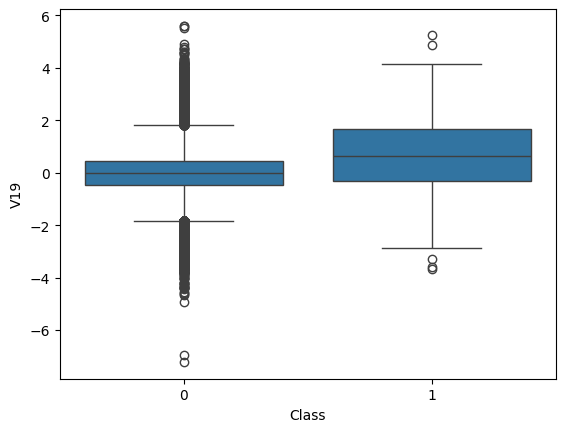

In [28]:
sns.boxplot(x='Class', y='V19', data=f)

<Axes: xlabel='Class', ylabel='V20'>

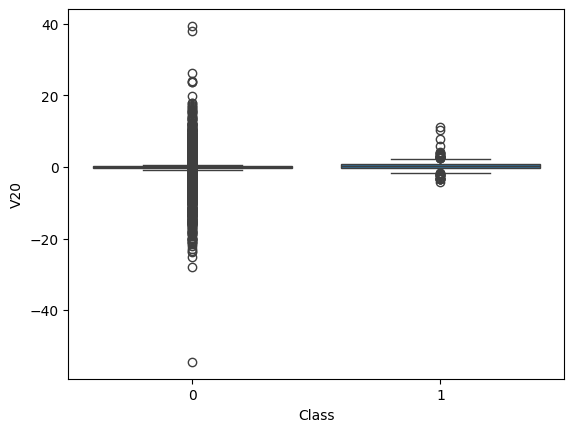

In [29]:
sns.boxplot(x='Class', y='V20', data=f)

<Axes: xlabel='Class', ylabel='V21'>

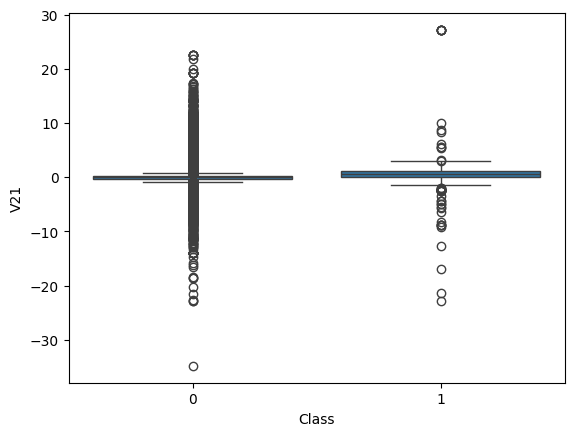

In [30]:
sns.boxplot(x='Class', y='V21', data=f)

<Axes: xlabel='Class', ylabel='V22'>

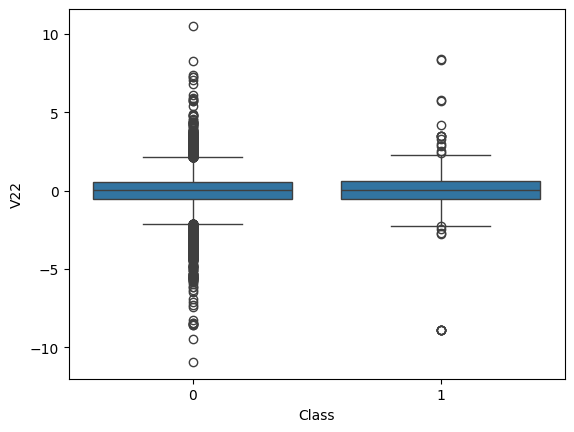

In [31]:
sns.boxplot(x='Class', y='V22', data=f)

<Axes: xlabel='Class', ylabel='V23'>

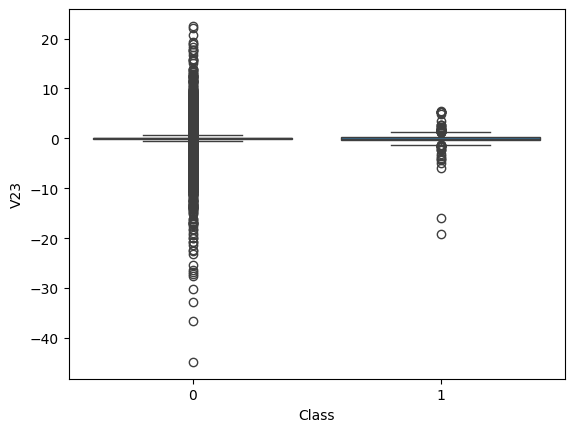

In [32]:
sns.boxplot(x='Class', y='V23', data=f)

<Axes: xlabel='Class', ylabel='V24'>

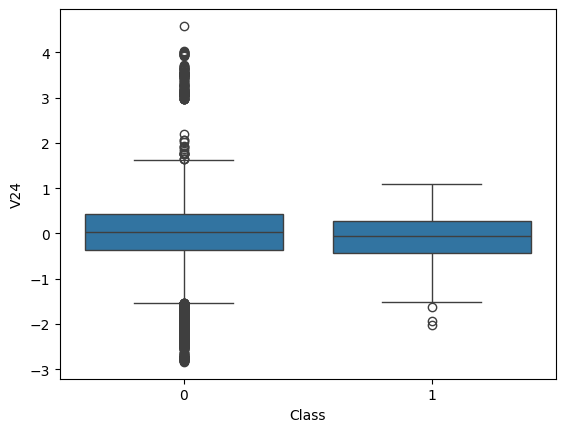

In [33]:
sns.boxplot(x='Class', y='V24', data=f)

<Axes: xlabel='Class', ylabel='V25'>

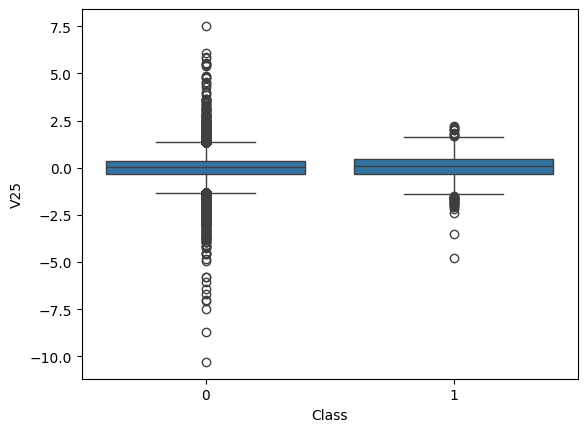

In [34]:
sns.boxplot(x='Class', y='V25', data=f)

<Axes: xlabel='Class', ylabel='V26'>

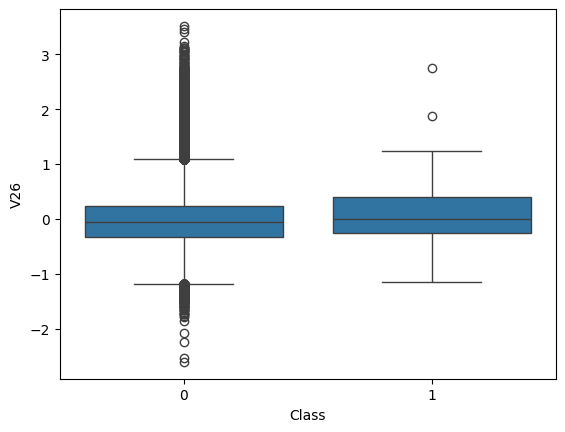

In [35]:
sns.boxplot(x='Class', y='V26', data=f)

<Axes: xlabel='Class', ylabel='V27'>

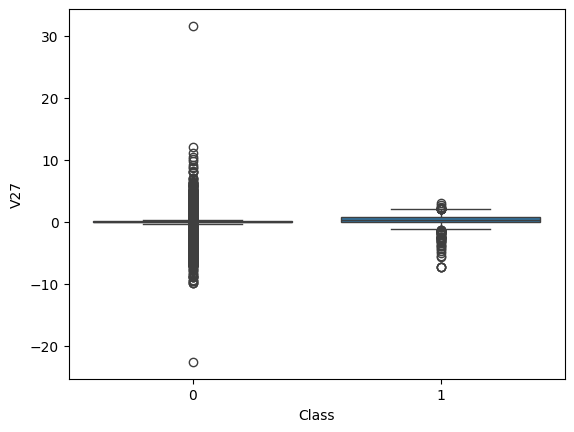

In [36]:
sns.boxplot(x='Class', y='V27', data=f)

<Axes: xlabel='Class', ylabel='V28'>

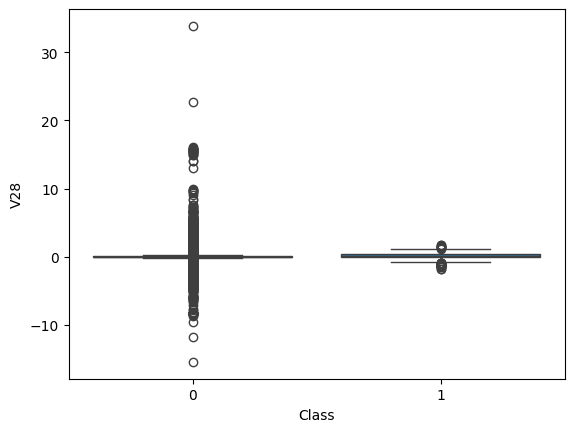

In [37]:
sns.boxplot(x='Class', y='V28', data=f)

<Axes: xlabel='Class', ylabel='Time'>

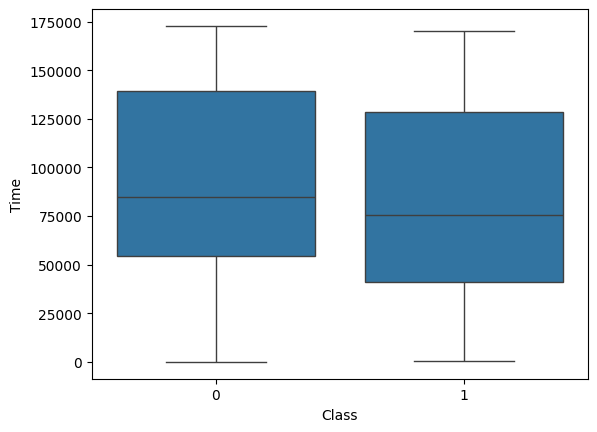

In [38]:
sns.boxplot(x='Class', y='Time', data=f)

# Handling the class imbalance

In [39]:
over = SMOTE(sampling_strategy = 0.5)
under = RandomUnderSampler(sampling_strategy = 0.1)
X = df.drop('Class', axis=1).values  # Features
Y = df['Class'].values  # Target (fraud or not)
steps = [('under', under),('over', over)]
pipeline = Pipeline(steps=steps)
X, Y = pipeline.fit_resample(X, Y)
Counter(Y)

Counter({0: 4920, 1: 2460})

# Building & evaluating the models

In [40]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X, Y, test_size = 0.20, random_state = 2)

In [47]:
def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')

    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       975
           1       0.99      0.90      0.94       501

    accuracy                           0.96      1476
   macro avg       0.97      0.95      0.96      1476
weighted avg       0.96      0.96      0.96      1476



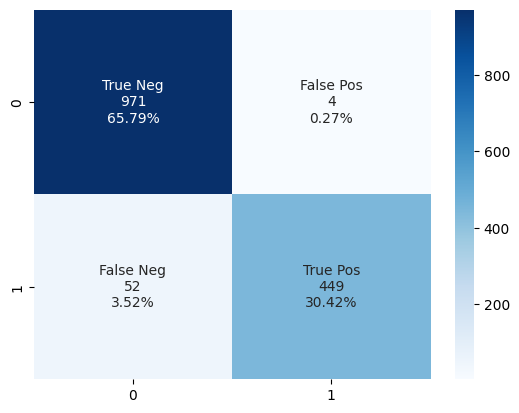

In [57]:
classifier_dt1 = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
classifier_dt1.fit(x_train1, y_train1)
model_evaluation(classifier_dt1,x_test1,y_test1)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:33:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99       975
           1       0.99      0.97      0.98       501

    accuracy                           0.99      1476
   macro avg       0.99      0.98      0.99      1476
weighted avg       0.99      0.99      0.99      1476



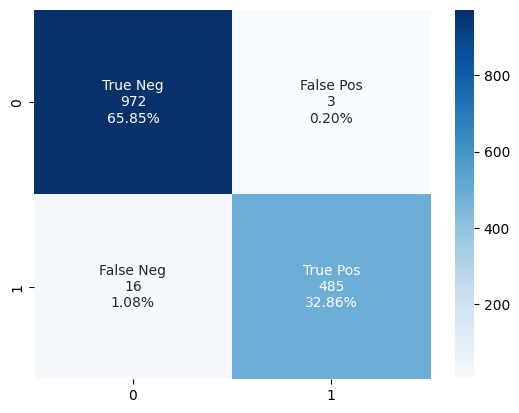

In [56]:
classifier_dt2 = XGBClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)
classifier_dt2.fit(x_train1, y_train1)
model_evaluation(classifier_dt2,x_test1,y_test1)